In [3]:
import pickle                            # open our file
import pandas as pd
import os
import re

# plotting image with word cloud
from PIL import Image                    # for our images
import numpy as np                       # convert image to np arrays
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS # generate word cloud
import matplotlib.pyplot as plt          # plotting

# nlp
import nltk                              # text processing
from nltk import word_tokenize           # split sentence into list of words
from nltk.corpus import stopwords        # remove: and,it,i,etc
import string                            # remove punctuation
from collections import defaultdict      # dictionary with values as lists
from nltk.stem import WordNetLemmatizer  # remove word endings etc

In [4]:

filename='Indeed_scrape_Oct2020.txt'
indeed_file_ =open(filename,'rb')
indeed_jobs = pickle.load(indeed_file_)
indeed_jobs.head()


,job_title,company_name,location,summary,post_Date,Qualification_link,Qual_Text,skill_matches
0,"Data Scientist, Medical Diagnostics",Specific Diagnostics,"Mountain View, CA 94043",The development of data-driven visualization t...,30+ days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0ASXGwdLWjBNYivRa...,The CompanyThe world is facing a medical crisi...,"[python, sql, visualization, c+, c++, nosql, dl]"
1,Data Scientist,Laxmi Therapeutic Devices,"Goleta, CA 93117",7+ years' practical experience manipulating da...,16 days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0ALgD31io3l0I0Y-r...,Data ScientistLaxmi Therapeutic Devices – Gole...,"[python, sql, statistics, algorithms, dl]"
2,Data Scientist,Blue Owl,"San Francisco, CA","We’re using rich customer insights, advanced t...",30+ days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0D3UvD5kBSgX9r9tF...,"Our Mission\nWe’re here to create a safer, hap...","[python, machine learning, deep learning, pand..."
3,Data Engineer,"Amick Brown, LLC","Sunnyvale, CA",Develops technical tools and programming that ...,Today,/pagead/clk?mo=r&ad=-6NYlbfkN0A74pTrSPrBtiJlYH...,"Data EngineerSunnyvale, CAAmick Brown is seeki...","[python, sql, aws, machine learning, machine l..."
4,Data Scientist,Triplebyte,California,You'll report directly to Triplebytes' Head of...,22 days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0AMr11YIOo206dX9C...,About Triplebyte\n\nTriplebyte is transforming...,"[aws, machine learning, machine learning, time..."


In [5]:
indeed_jobs['Qual_Text'][0]

'The CompanyThe world is facing a medical crisis, bacteria are increasingly evolving resistance to even our strongest antibiotics. The problem is already very real and immediate; for example, bloodstream infection leading to sepsis is now responsible for more than half of all deaths in hospitals and is the most expensive condition treated in hospitals. Sepsis mortality rate increases >6% every hour without effective antibiotic treatment. Yet, despite the life and death urgency, and healthcare cost impacts, current methodologies require 3 days to determine the correct antibiotic.Specific Diagnostics has developed a breakthrough solution to rapidly determine the effective antibiotic treatment for bloodstream and other acute infections. Used for bloodstream infection Specific’s solution provides results 2 days sooner than existing methods, saving patients suffering from drug-resistant infection.We have been funded by nearly $30 M in non-dilutive government sponsored research support and r

# The `skills_match` column is especially important: 


`buzz_words=['Python','SQL','AWS', 'Machine learning','Deep learning','Text mining',
'NLP','SAS','Tableau','Sagemaker','Tensorflow','Spark', 'numpy', 'MongDB','PSQL',
"Postgres", 'Pandas', 'RESTFUL','NLP','Statistics','Algorithms','Visualization',
'GCP','Google Cloud','Naive Bayes','Random Forest','Bachelors degree','Masters degree'
'Java','Pyspark','Postgres','MySQL','Github','Docker','Machine Learning','C+',
'C++','Pytorch','Jupyter Notebook','R Studio','R-Studio','Forecasting','Hive',
'PhD','GCP','Numpy','NoSQL','Neo4j','Neural Network','Clustering','Linear Algebra',
'Google Colab','Data Mining','Regression','Time Series','ETL','Data Wrangling',
'Web Scraping','Feature Extraction','Featuring Engineering','Scipy','ML','DL']
buzz_words_list=[x.lower() for x in buzz_words]  # convert list to lowercase to parse`

In [6]:
orig_word_cnts=[]
for i in indeed_jobs['Qual_Text']:
    orig_word_cnts.append(len(i))

indeed_text_cnts=pd.concat([indeed_jobs['Qual_Text'],
pd.DataFrame(orig_word_cnts,columns=['Qual_Text_wrdCnt'])],axis=1)

indeed_text_cnts.head()

,Qual_Text,Qual_Text_wrdCnt
0,The CompanyThe world is facing a medical crisi...,3938
1,Data ScientistLaxmi Therapeutic Devices – Gole...,2798
2,"Our Mission\nWe’re here to create a safer, hap...",3423
3,"Data EngineerSunnyvale, CAAmick Brown is seeki...",2505
4,About Triplebyte\n\nTriplebyte is transforming...,2772


In [7]:
#  re_pattern=r'\b(?:http.*).+?(?=\")\b'

find_web_links=[]
for i in indeed_jobs['Qual_Text']:
#     print(type(i))
        re_pattern=r'\b(?:http).+\b'
        if re.findall(re_pattern,i):
            find_web_links.append(re.findall(re_pattern,i))
        else:
            find_web_links.append([])
len(find_web_links)
find_web_links[:13]

[[],
 [],
 ['https://sfgov.org/olse/sites/default/files/FCO%20poster2020.pdf'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['https://www.amazon.jobs/en/disability/us'],
 []]

In [8]:
text_wo_http=[]
for i in indeed_jobs['Qual_Text']:
    re_pattern=r'\b(?:http).+\b'
    if re.findall(re_pattern,i):
        text_wo_http.append(re.sub(re_pattern,' ',i))
    else:
        text_wo_http.append(i)
len(text_wo_http )


225

In [9]:
# verify it worked:

text_wo_http_recheck=[]
for i in text_wo_http:
#     print(type(i))
        re_pattern=r'\b(?:http).+\b'
        if re.findall(re_pattern,i):
            text_wo_http_recheck.append(re.findall(re_pattern,i))     
print('Looks good with len =',len(text_wo_http_recheck))

Looks good with len = 0


In [10]:
len_wo_hyperlinks=[]
for i in text_wo_http:
    len_wo_hyperlinks.append(len(i))

indeed_text_cnts['len_wo_hyperlinks']=len_wo_hyperlinks
indeed_text_cnts.head(13)
# there is a difference, this is more for a sanity check most of all
# row 2,12 show the differences

,Qual_Text,Qual_Text_wrdCnt,len_wo_hyperlinks
0,The CompanyThe world is facing a medical crisi...,3938,3938
1,Data ScientistLaxmi Therapeutic Devices – Gole...,2798,2798
2,"Our Mission\nWe’re here to create a safer, hap...",3423,3361
3,"Data EngineerSunnyvale, CAAmick Brown is seeki...",2505,2505
4,About Triplebyte\n\nTriplebyte is transforming...,2772,2772
5,About the team:\n\nThe Evernote Analytics team...,3032,3032
6,"Summary\nPosted: Oct 9, 2020\nWeekly Hours: 40...",3239,3239
7,About RMDS LabRMDS Lab and its Global Associat...,2270,2270
8,Who we are: Fueled by a fundamental belief tha...,4882,4882
9,Greetings Applicant!Here at Parsec Education w...,4328,4328


In [11]:
# New DF with the https removed:
indeed_jobs['Qual_Text_woHttp_1stStep']=text_wo_http
indeed_jobs.head()

,job_title,company_name,location,summary,post_Date,Qualification_link,Qual_Text,skill_matches,Qual_Text_woHttp_1stStep
0,"Data Scientist, Medical Diagnostics",Specific Diagnostics,"Mountain View, CA 94043",The development of data-driven visualization t...,30+ days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0ASXGwdLWjBNYivRa...,The CompanyThe world is facing a medical crisi...,"[python, sql, visualization, c+, c++, nosql, dl]",The CompanyThe world is facing a medical crisi...
1,Data Scientist,Laxmi Therapeutic Devices,"Goleta, CA 93117",7+ years' practical experience manipulating da...,16 days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0ALgD31io3l0I0Y-r...,Data ScientistLaxmi Therapeutic Devices – Gole...,"[python, sql, statistics, algorithms, dl]",Data ScientistLaxmi Therapeutic Devices – Gole...
2,Data Scientist,Blue Owl,"San Francisco, CA","We’re using rich customer insights, advanced t...",30+ days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0D3UvD5kBSgX9r9tF...,"Our Mission\nWe’re here to create a safer, hap...","[python, machine learning, deep learning, pand...","Our Mission\nWe’re here to create a safer, hap..."
3,Data Engineer,"Amick Brown, LLC","Sunnyvale, CA",Develops technical tools and programming that ...,Today,/pagead/clk?mo=r&ad=-6NYlbfkN0A74pTrSPrBtiJlYH...,"Data EngineerSunnyvale, CAAmick Brown is seeki...","[python, sql, aws, machine learning, machine l...","Data EngineerSunnyvale, CAAmick Brown is seeki..."
4,Data Scientist,Triplebyte,California,You'll report directly to Triplebytes' Head of...,22 days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0AMr11YIOo206dX9C...,About Triplebyte\n\nTriplebyte is transforming...,"[aws, machine learning, machine learning, time...",About Triplebyte\n\nTriplebyte is transforming...


In [12]:
# import string
wrd_lst_tokens=[]
for ikl in indeed_jobs['Qual_Text_woHttp_1stStep']:
    punct=word_tokenize(''.join(j for j in ikl.lower() if j not in string.punctuation if not j.isdigit()))
    wrd_lst_tokens.append([punct])

pd.DataFrame(wrd_lst_tokens,columns=['Qualification_text_removed_punct_digits']).head()

# feel free to use a dictionary with this if you want.

,Qualification_text_removed_punct_digits
0,"[the, companythe, world, is, facing, a, medica..."
1,"[data, scientistlaxmi, therapeutic, devices, –..."
2,"[our, mission, we, ’, re, here, to, create, a,..."
3,"[data, engineersunnyvale, caamick, brown, is, ..."
4,"[about, triplebyte, triplebyte, is, transformi..."


In [13]:
clean_stp_wrds=[]
stopwrds = stopwords.words('english')
for i in wrd_lst_tokens:
# removing single letters, [:-2] will remove last 2 str from each list bc useless
    line = [j for j in i[0] if len(j) > 1]
#     print(line)
# remove our stopwords like: ('i','it','etc')
    clean_stp_wrds.append([[ii for ii in line if ii not in stopwrds]])


# print('Example of amount of data after: ',len(pd.DataFrame(d)[0][1])/len(news_['content'][0]))
pd.DataFrame(clean_stp_wrds).head()


,0
0,"[companythe, world, facing, medical, crisis, b..."
1,"[data, scientistlaxmi, therapeutic, devices, g..."
2,"[mission, create, safer, happier, mindful, fut..."
3,"[data, engineersunnyvale, caamick, brown, seek..."
4,"[triplebyte, triplebyte, transforming, way, so..."


In [14]:
second_wrd_cnt=[]
for i in clean_stp_wrds:
    for j in i:
        second_wrd_cnt.append(len(j))

indeed_text_cnts['cleaned_wrd_cnt']=second_wrd_cnt
indeed_text_cnts.head()

,Qual_Text,Qual_Text_wrdCnt,len_wo_hyperlinks,cleaned_wrd_cnt
0,The CompanyThe world is facing a medical crisi...,3938,3938,317
1,Data ScientistLaxmi Therapeutic Devices – Gole...,2798,2798,241
2,"Our Mission\nWe’re here to create a safer, hap...",3423,3361,329
3,"Data EngineerSunnyvale, CAAmick Brown is seeki...",2505,2505,224
4,About Triplebyte\n\nTriplebyte is transforming...,2772,2772,252


# `Lemmatization: looking for root or bases of words`


In [15]:
# from collections import defaultdict
# from nltk.stem import WordNetLemmatizer  # remove word endings etc

lemmatizer = WordNetLemmatizer()
lemma_lst=[]
for i in range(len(clean_stp_wrds)):
    for j in clean_stp_wrds[i][0]: # going inside each list and doing each word
#         print(j)
        lemma_lst.append([i,lemmatizer.lemmatize(j)]) # i keeps the position 

dg=defaultdict(list)

for i in lemma_lst:
    dg[i[0]].append(i[1]) # key=position,value:list of lists of strings


In [16]:
third=[]
for i in dg.values():
    third.append(len(i))


In [17]:
indeed_text_cnts['lemma_len']=third
indeed_text_cnts['lemma_wrds']=dg.values()
indeed_text_cnts.head()

,Qual_Text,Qual_Text_wrdCnt,len_wo_hyperlinks,cleaned_wrd_cnt,lemma_len,lemma_wrds
0,The CompanyThe world is facing a medical crisi...,3938,3938,317,317,"[companythe, world, facing, medical, crisis, b..."
1,Data ScientistLaxmi Therapeutic Devices – Gole...,2798,2798,241,241,"[data, scientistlaxmi, therapeutic, device, go..."
2,"Our Mission\nWe’re here to create a safer, hap...",3423,3361,329,329,"[mission, create, safer, happier, mindful, fut..."
3,"Data EngineerSunnyvale, CAAmick Brown is seeki...",2505,2505,224,224,"[data, engineersunnyvale, caamick, brown, seek..."
4,About Triplebyte\n\nTriplebyte is transforming...,2772,2772,252,252,"[triplebyte, triplebyte, transforming, way, so..."


In [33]:
pd.to_pickle(indeed_text_cnts,'indeed_cleaned_dta.pkl')

In [18]:
import re
check_science_wrds=[]
for i in dg.values():
    for j in i:
        if re.findall(r'\b(?:scien.*).+',j):
            check_science_wrds.append(re.findall(r'\b(?:scien.*).+',j))
pd.DataFrame(check_science_wrds).head(12)

,0
0,science
1,science
2,scientist
3,science
4,science
5,science
6,scientistlaxmi
7,science
8,science
9,science


# `Convert list of lists into a large string of everything`

In [19]:
combine_all_wrd=[]
for i in indeed_text_cnts['lemma_wrds']:
    for j in i:
#     print(type(i))
#     print(len(i))
        combine_all_wrd.append(j)

b=' '.join(combine_all_wrd)

In [20]:
f={}
for i in indeed_text_cnts['lemma_wrds']:
    for j in i:
#     print(i)
        if j in f:
            f[j]+=1
        else:
            f[j]=1
wrd_freq={k: v for k, v in sorted(f.items(), key=lambda item: item[1],reverse=True)}


In [21]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

# ax.bar(wrd_freq.keys(),wrd_freq.values())
# plt.show()
# wrd_freq['']

In [22]:
more_wrd_to_remove=['year','experience','user','employee','type','llc','member','youll',
'various','range','position','end','service','leveljob','wide','card','bring',
'sexual orientation','sexual', 'orientation','veteran','status','employer','year experience',
'due','covid','natural origin','using','u','sexal','sexal orientation',
'sexalorientation','decovid','de covid']
# ,'national','national origin']

In [23]:
# Remove further nonsense words:
o=[]
for i in more_wrd_to_remove:
    if i in b:
        g=b.replace(i,'')
len(b)
len(g)
# more_wrd_to_remove

567278

In [24]:
len(b)

581279

In [29]:
# mask: 
# img_mask= np.array(Image.open(os.path.join(os.getcwd(),'cartoon_computer.png')))
# img_mask=np.array(Image.open('cartoon_computer.png'))
# img_mask=np.array(Image.open('cloud_img.png'))
img_mask=np.array(Image.open('Slide1.png'))
# img_mask

In [30]:
wc=WordCloud(background_color='black',max_words=850,max_font_size=70,random_state=1,
    mask=img_mask,contour_color='red',min_font_size=8,normalize_plurals=True)


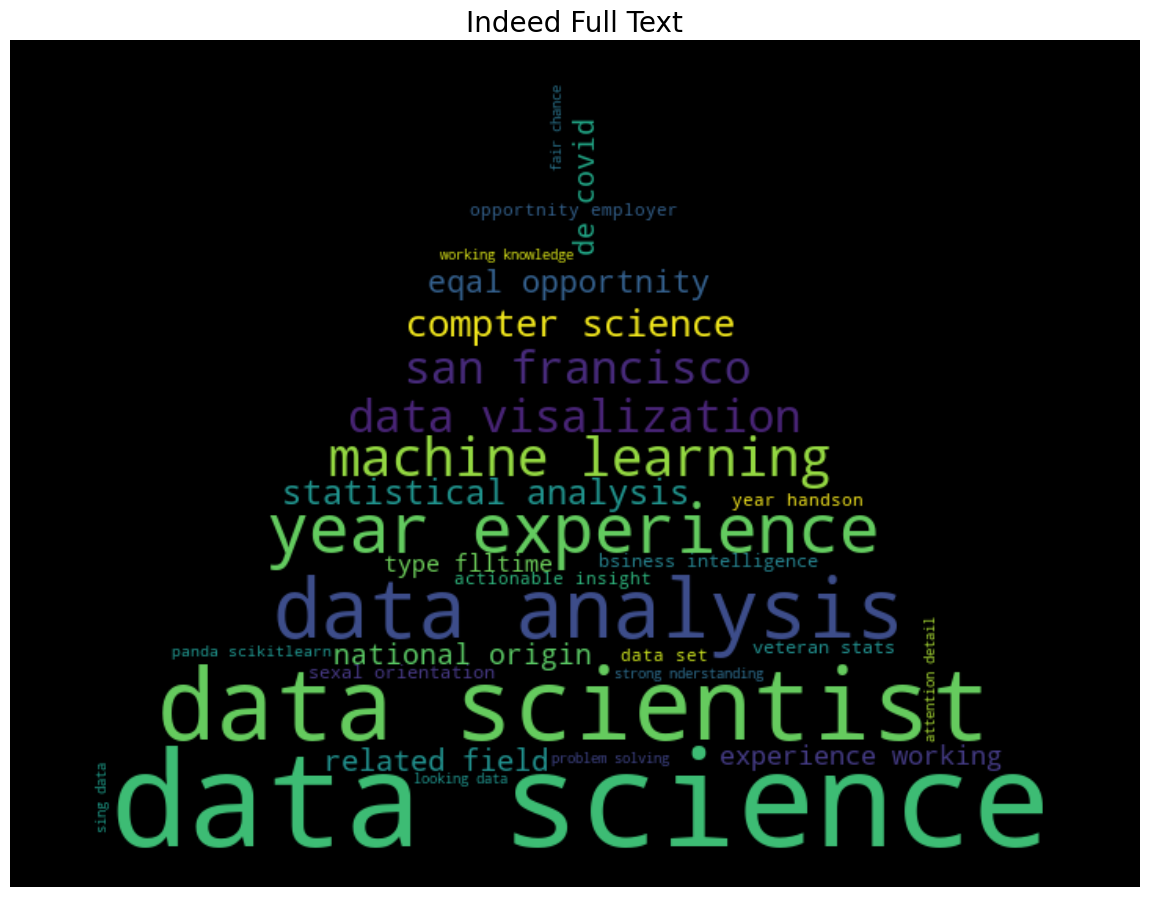

Words List: ['data science', 'data scientist', 'data analysis', 'year experience', 'machine learning', 'data visalization', 'san francisco', 'compter science', 'statistical analysis', 'eqal opportnity', 'related field', 'de covid', 'national origin', 'experience working', 'type flltime', 'bsiness intelligence', 'sexal orientation', 'veteran stats', 'opportnity employer', 'actionable insight', 'year handson', 'data set', 'panda scikitlearn', 'strong nderstanding', 'sing data', 'fair chance', 'looking data', 'problem solving', 'attention detail', 'working knowledge']
Frequencies List: [1.0, 0.91, 0.62, 0.55, 0.48, 0.43, 0.42, 0.35, 0.34, 0.3, 0.28, 0.26, 0.25, 0.23, 0.23, 0.23, 0.22, 0.22, 0.22, 0.22, 0.21, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


In [35]:
wc.generate(g)
# wc.generate(b)

# colors=wc.recolor(color_func=ImageColorGenerator(img_mask))
plt.figure(figsize=(22,11))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Full Text",fontsize=20)
plt.axis("off")
plt.show()

# Accessing the words and their frequencies from the WordCloud
word_frequencies = wc.words_

# Storing the words and their frequencies in lists
words_list = list(word_frequencies.keys())
frequencies_list = list(word_frequencies.values())

# Printing the lists to verify the contents
print("Words List:", words_list)
print("Frequencies List:", frequencies_list)


# `Skills taken from column matching our subset list:`

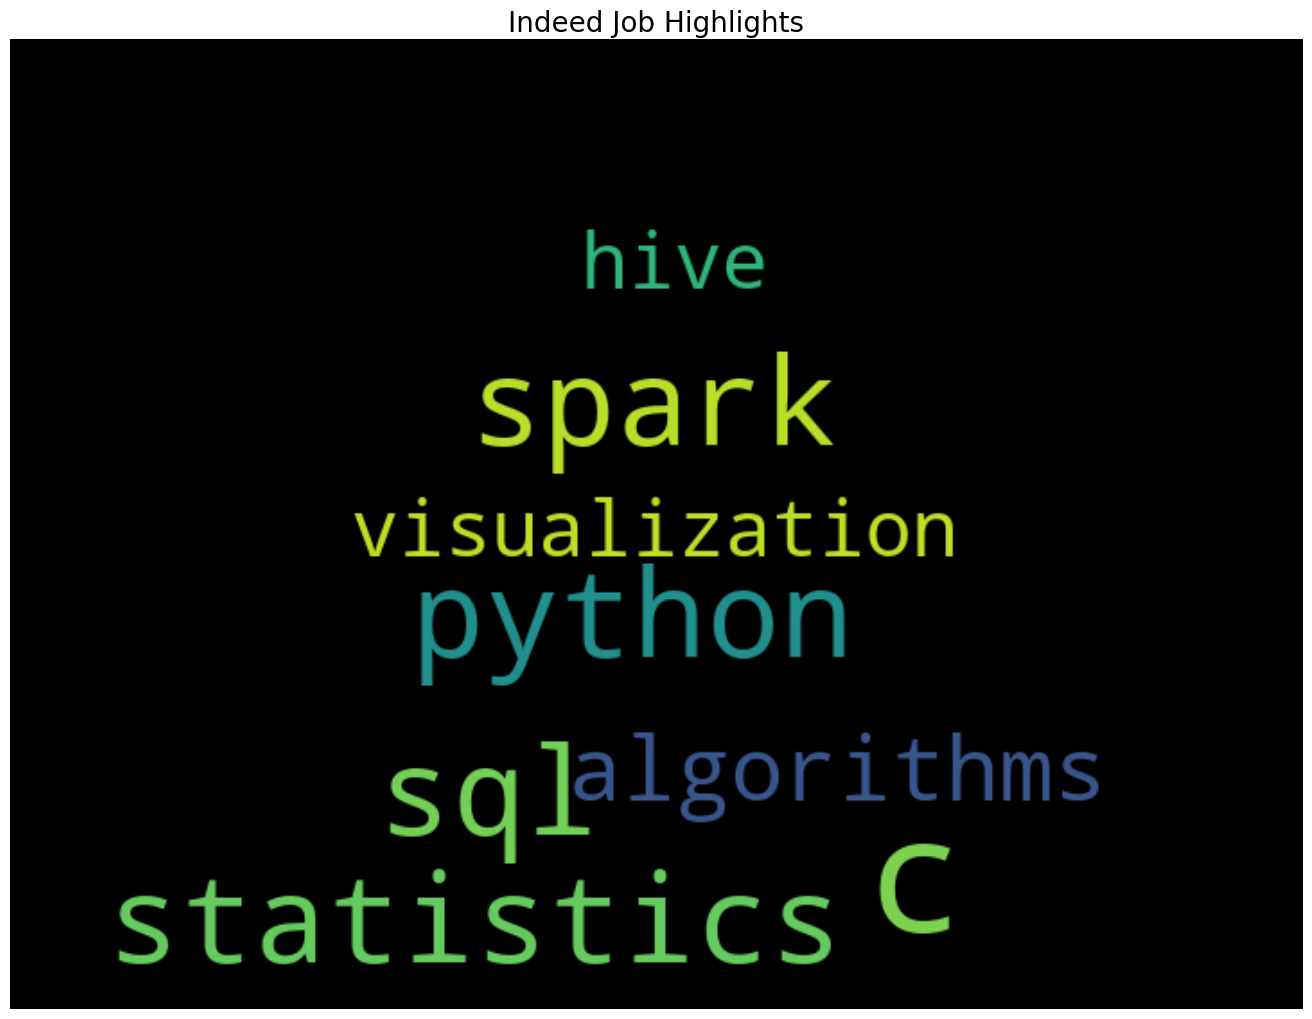

Words List: ['c', 'python', 'sql', 'spark', 'statistics', 'algorithms', 'visualization', 'hive']
Frequencies List: [1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [36]:
skills=[]
for i in indeed_jobs['skill_matches']:
     b_=" ".join(review for review in i)
wc=WordCloud(background_color='black',max_words=30,max_font_size=90,random_state=1,
    mask=img_mask)
wc.generate(b_)
plt.figure(figsize=(22,10))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Job Highlights",fontsize=20)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Accessing the words and their frequencies from the WordCloud
word_frequencies = wc.words_

# Storing the words and their frequencies in lists
words_list = list(word_frequencies.keys())
frequencies_list = list(word_frequencies.values())

# Printing the lists to verify the contents
print("Words List:", words_list)
print("Frequencies List:", frequencies_list)
